## Creating a Custom Loss Function

Available Loss Functions in Keras
## 1. Hinge Losses in Keras
These are the losses in machine learning which are useful for training different classification algorithms. In support vector machine classifiers we mostly prefer to use hinge losses.

Different types of hinge losses in Keras:

Hinge
Categorical Hinge
Squared Hinge
## 2. Regression Loss functions in Keras
These are useful to model the linear relationship between several independent and a dependent variable.

Different types of Regression Loss function in Keras:

Mean Square Error
Mean Absolute Error
Cosine Similarity
Huber Loss
Mean Absolute Percentage Error
Mean Squared Logarithmic Error
Log Cosh
## 3. Binary and Multiclass Loss in Keras
These loss functions are useful in algorithms where we have to identify the input object into one of the two or multiple classes.
Spam classification is an example of such type of problem statements.

Binary Cross Entropy.
Categorical Cross Entropy.
Poisson Loss.
Sparse Categorical Cross Entropy.
KLDivergence

## Common Loss and Loss Functions in Keras

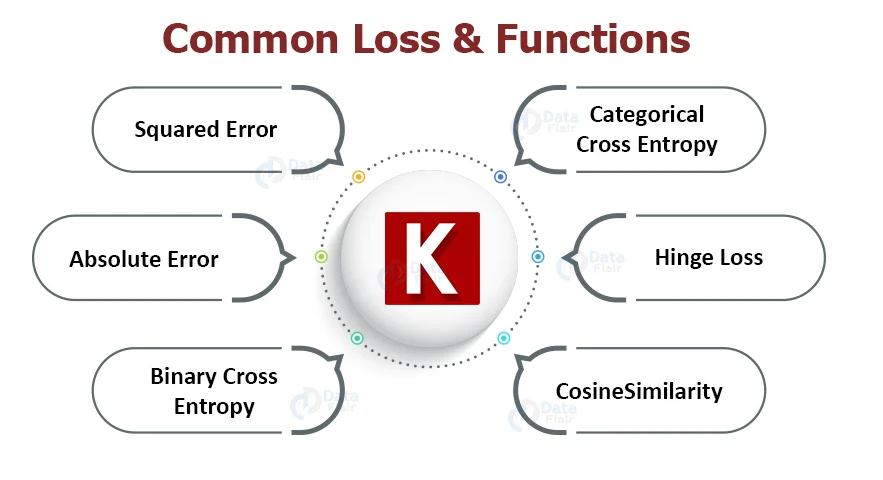

## 1. Squared Error
In Squared Error Loss, we calculate the square of the difference between the original and predicted values. We calculate this for each input data in the training set. The mean of these squared errors is the corresponding loss function and it is called Mean Squared Error. This loss is also known as L2 Loss.

Available in keras as:

keras.losses.MeanSquaredError()
## 2. Absolute Error in Keras
In Absolute error, we take the mode of the difference of original and predicted values. The mean of these absolute errors is the corresponding mean absolute error.

Available as:

keras.losses.MeanAbsoluteError()

## 3. Binary Cross Entropy in Keras
It is used to calculate the loss of classification model where the target variable is binary like 0 and 1.

keras.losses.BinaryCrossentropy(
    from_logits, label_smoothing, reduction, name="binary_crossentropy"
)
## 4. Categorical Cross Entropy in Keras
It is used for the classification models where the target classes are more than two. It is a generalization of binary cross-entropy.

keras.losses.CategoricalCrossentropy(
    from_logits,
    label_smoothing,
    reduction,
    name="categorical_crossentropy",
)
## 5. Hinge Loss in Keras
Here loss is defined as,

loss=max(1-actual*predicted,0)
The actual values are generally -1 or 1. And if it is not, then we convert it to -1 or 1.

This loss is available as:

keras.losses.Hinge(reduction,name)

## 6. CosineSimilarity in Keras
Calculate the cosine similarity between the actual and predicted values.
The loss equation is:

loss=-sum(l2_norm(actual)*l2_norm(predicted))

All of these losses are available in Keras.losses module. The below code shows an example of how to use these loss functions in neural network code.

from keras import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(64,kernel_initializer=’uniform’,input_shape=(20,)))
model.compile(loss=’categorical_crossentropy’,optimizer=’adam’,activation=’softmax’)
## Custom Loss Function in Keras
Creating a custom loss function and adding these loss functions to the neural network is a very simple step. You just need to describe a function with loss computation and pass this function as a loss parameter in .compile method.

def custom_loss_function(actual,prediction):
  loss=(prediction-actual)*(prediction-actual)
  return loss
model.compile(loss=custom_loss_function,optimizer=’adam’)

## Losses with Compile and Fit methods
The .compile() method in Keras expects a loss function and an optimizer for model compilation. These two parameters are a must.
We add the loss argument in the .compile() method with a loss function, like:

from keras.losses import CategoricalCrossentropy
from keras.layers import Dense
from keras import Sequential
model=Sequential()
model.add(Dense(32,kernel_initializer=’uniform’,input_shape=(20,)))
model.add(Activation(‘softmax’))
loss_function=CategoricalCrossentropy()
model.compile(loss=loss_function,optimizer=’adam’)
## Using Inbuilt Loss Function in Keras
To use inbuilt loss functions we simply pass the string identifier of the loss function to the “loss” parameter in the compile method.

For example, to use binary_crossentropy:

from keras.models import Sequential
model=Sequential()
model.add(Dense(64,input_shape=(1,),activation=’relu’))
model.add(Dense(32,activation=’relu’))
model.compile(loss=’binary_crossentropy’,optimizer=’adam’)
## add_loss() API in Keras
Using this API user can add regularization losses in the custom layers. We use this API in the call method of the custom class. This API keeps the track of loss terms.

from keras.layers import Layer
class Custom_layer(Layer):
def __init__(self,rate=1e-2):
super(Custom_layer,self).__init__()
self.rate=rate
def call(self,inputs):
self.add_loss(self.rate*tf.square(inputs))
return inputs 
## Summary
This article is a guide to keras.losses module of Keras. It explains what loss and loss functions are in Keras. It describes different types of loss functions in Keras and its availability in Keras. We discuss in detail about the four most common loss functions, mean square error, mean absolute error, binary cross-entropy, and categorical cross-entropy. At last, there is a sample to get a better understanding of how to use loss function.





This short exercise will require you to write a simple linear regression neural network that is trained on two arrays:  (inputs) and  (labels), where the relationship between each corresponding element is .



You will need to implement a custom loss function that returns the root mean square error (RMSE) of . Let's begin!

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K

import utils

In [2]:
# inputs
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)

# labels. relationship with the inputs above is y=2x-1.
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## Define the custom loss function (TODO)
Define the custom loss function below called my_rmse() that returns the RMSE between the target (y_true) and prediction (y_pred).

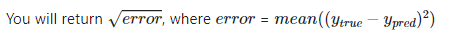You will return , where  = 

error: the difference between the true label and predicted label.
sqr_error: the square of the error.
mean_sqr_error: the mean of the square of the error
sqrt_mean_sqr_error: the square root of hte mean of the square of the error (the root mean squared error).
Please use K.mean, K.square, and K.sqrt
The steps are broken down into separate lines of code for clarity. Feel free to combine them, and just remember to return the root mean squared error.

In [3]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



def my_rmse(y_true, y_pred):
    error = y_true - y_pred
    sqr_error = K.square(error)
    mean_sqr_error = K.mean(sqr_error)
    sqrt_mean_sqr_error = K.sqrt(mean_sqr_error)
    return sqrt_mean_sqr_error

In [4]:
# utils.test_my_rmse(my_rmse)

## Define a model using the custom loss function (TODO)
Similar to the ungraded labs, you will define a simple model and pass the function you just coded as the loss.

- When compiling the model, you'll choose the sgd optimizer and set the loss parameter to the custom loss function that you just defined.
- For grading purposes, please leave the other parameter values as is.

In [5]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# define the model architecture
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

# use the function you just coded as the loss
model.compile(optimizer='sgd', loss=my_rmse)
              
# train the model 
model.fit(xs, ys, epochs=500,verbose=0)
              
# test with a sample input
print(model.predict([10.0]))

1/1 [==============================] - 0s 101ms/step
[[19.181046]]


In [6]:
# utils.test_model_loss(model.loss)